# STA 141B: Homework 6
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Wei-Kuang

Last Name: Lin

Student ID: 997062562

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Web scraping the Aggie

In this assignment, you'll scrape text from [The California Aggie](https://theaggie.org/) and then analyze the text.

The Aggie is organized by category into article lists. For example, there's a [Campus News](https://theaggie.org/campus/) list, [Arts & Culture](https://theaggie.org/arts/) list, and [Sports](https://theaggie.org/sports/) list. Notice that each list has multiple pages, with a maximum of 15 articles per page.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Aggie for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in an Aggie article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Have a parameter `page` for the number of pages to fetch links from. The default should be `1`.

* Return a list of aricle URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite to The Aggie and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* Start by getting your function to work for just 1 page. Once that works, have your function call itself to get additional pages.

* You can use [lxml.html](http://lxml.de/lxmlhtml.html) or [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to scrape HTML. Choose one and use it throughout the entire assignment.

In [639]:
# web scrapping
import requests
import requests_ftp
import requests_cache
import lxml
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
requests_cache.install_cache('141B_hw6_cache')
%matplotlib inline

In [839]:
# data
import numpy as np

In [640]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [641]:
# Set up NLTK packages used by TextBlob.
import nltk
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("brown")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WeiKuang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [642]:
# Natural Language Processing
# from wordcloud import WordCloud, STOPWORDS  #(This cannot be installed)
from textblob import TextBlob
from nltk.corpus import stopwords # removing Noise
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer

In [643]:
def get_link (url, page):
    '''
    Action: Extracts all of the links to articles in an Aggie article list
    Argument: "url" as string and "page" as number
    Return: A list contains all links of article on the requested page
    '''
    new_url= url + 'page'+ '/' + str(page) + '/'
    Web_req= requests.get(new_url)
    Web_html = Web_req.text
    Web_BS = BeautifulSoup(Web_html,'lxml')
    h2 = Web_BS.find_all(name='h2',attrs={'class':'entry-title'})
    
    L= []
    for i in range(len(h2)):
        for link in h2[i].find_all('a'):
            e= link.get('href')
        L.append(e)

    return(L)

In [644]:
# test 1
get_link("https://theaggie.org/campus/", page = 1)

['https://theaggie.org/2018/03/13/last-week-in-senate-25/',
 'https://theaggie.org/2018/03/12/uc-regents-will-vote-on-nonresident-tuition-hike-on-wednesday/',
 'https://theaggie.org/2018/03/12/cheating-allegations-in-soc-46a/',
 'https://theaggie.org/2018/03/12/chancellor-creates-three-task-forces-to-improve-student-life/',
 'https://theaggie.org/2018/03/06/duke-law-professor-presents-lecture-voting-rights-law/',
 'https://theaggie.org/2018/03/05/last-week-senate-25-8/',
 'https://theaggie.org/2018/03/05/icc-warns-students-wary-suspicious-job-offering/',
 'https://theaggie.org/2018/03/04/uc-davis-student-protester-arrested-yiannopoulos-talk-last-year-awaits-trial/',
 'https://theaggie.org/2018/03/01/executive-ticket-candidates-claim-biases-non-asucd-affiliated-individuals/',
 'https://theaggie.org/2018/03/01/happiness-campaign-strives-less-stress-joy/',
 'https://theaggie.org/2018/02/27/senator-term-review-yajaira-ramirez-sigala/',
 'https://theaggie.org/2018/02/27/calpirgs-winter-quar

In [645]:
# test 2
get_link("https://theaggie.org/campus/", page = 2)

['https://theaggie.org/2018/02/25/traditional-chinese-music-classes-offered-uc-davis-confucius-institute/',
 'https://theaggie.org/2018/02/25/last-week-senate-25-7/',
 'https://theaggie.org/2018/02/22/asucd-executive-tickets-hold-coho-debate/',
 'https://theaggie.org/2018/02/22/mental-health-town-hall-erupts-protest/',
 'https://theaggie.org/2018/02/22/asucd-senate-candidates-debate-largely-inattentive-crowd/',
 'https://theaggie.org/2018/02/22/adam-hatefi-shreya-deshpande-disqualified-missing-mandatory-candidate-workshop/',
 'https://theaggie.org/2018/02/20/last-week-senate-25-6/',
 'https://theaggie.org/2018/02/20/formerly-incarcerated-students-publish-zine-spread-stories/',
 'https://theaggie.org/2018/02/19/uaw-ucop-start-collective-bargaining-march/',
 'https://theaggie.org/2018/02/19/senator-term-review-marcos-rodriguez/',
 'https://theaggie.org/2018/02/19/2018-asucd-winter-elections-meet-candidates/',
 'https://theaggie.org/2018/02/16/director-counseling-psychological-services-te

In [646]:
# test 3
get_link("https://theaggie.org/photo/", page = 1)

['https://theaggie.org/2017/12/28/year-photos-2017/',
 'https://theaggie.org/2017/11/21/giving-thanks-through-photos/',
 'https://theaggie.org/2017/09/18/a-summer-worth-capturing/',
 'https://theaggie.org/2017/09/12/a-family-trip-through-europe/',
 'https://theaggie.org/2017/09/05/life-in-hong-kong-through-photos/',
 'https://theaggie.org/2017/08/07/in-the-footsteps-of-the-grand-tour/',
 'https://theaggie.org/2017/07/09/4th-of-july-in-photos/',
 'https://theaggie.org/2017/06/06/significant-snapshots/',
 'https://theaggie.org/2017/05/24/photo-of-the-week-5242017/',
 'https://theaggie.org/2017/05/17/photo-of-the-week-5172017/',
 'https://theaggie.org/2017/05/10/photo-of-the-week-5112017/',
 'https://theaggie.org/2017/05/03/photo-of-the-week-532017/',
 'https://theaggie.org/2017/04/26/in-photos-picnic-day-2017/',
 'https://theaggie.org/2017/04/19/photo-of-the-week-4192017/',
 'https://theaggie.org/2017/04/12/photo-of-the-week-4122017/']

__Exercise 1.2.__ Write a function that extracts the title, text, and author of an Aggie article. The function should:

* Have a parameter `url` for the URL of the article.

* For the author, extract the "Written By" line that appears at the end of most articles. You don't have to extract the author's name from this line.

* Return a dictionary with keys "url", "title", "text", and "author". The values for these should be the article url, title, text, and author, respectively.

For example, for [this article](https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/) your function should return something similar to this:
```
{
    'author': u'Written By: Bianca Antunez \xa0\u2014\xa0city@theaggie.org',
    'text': u'Davis residents create financial model to make city\'s financial state more transparent To increase transparency between the city\'s financial situation and the community, three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams, who are members of Davis\' Finance and Budget Commission, joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February, according to Kelly Stachowicz, assistant city manager. "City staff appreciate the efforts that have gone into this, and the interest in trying to look at the city\'s potential financial position over the long term," Stachowicz said in an email interview. "We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the budget for the next fiscal year and beyond." Project Toto complements the city\'s effort to amplify the transparency of city decisions to community members. The aim is to increase the understanding about the city\'s financial situation and make the information more accessible and easier to understand. The project is mostly a tool for public education, but can also make predictions about potential decisions regarding the city\'s financial future. Once completed, the program will allow residents to manipulate variables to see their eventual consequences, such as tax increases or extensions and proposed developments "This really isn\'t a budget, it is a forecast to see the intervention of these decisions," Williams said in an interview with The Davis Enterprise. "What happens if we extend the sales tax? What does it do given the other numbers that are in?" Project Toto enables users, whether it be a curious Davis resident, a concerned community member or a city leader, with the ability to project city finances with differing variables. The online program consists of the 400-page city budget for the 2016-2017 fiscal year, the previous budget, staff reports and consultant analyses. All of the documents are cited and accessible to the public within Project Toto. "It\'s a model that very easily lends itself to visual representation," Mayor Robb Davis said. "You can see the impacts of decisions the council makes on the fiscal health of the city." Complementary to this program, there is also a more advanced version of the model with more in-depth analyses of the city\'s finances. However, for an easy-to-understand, simplistic overview, Project Toto should be enough to help residents comprehend Davis finances. There is still more to do on the project, but its creators are hard at work trying to finalize it before the 2017-2018 fiscal year budget. "It\'s something I have been very much supportive of," Davis said. "Transparency is not just something that I have been supportive of but something we have stated as a city council objective [ ] this fits very well with our attempt to inform the public of our challenges with our fiscal situation." ',
    'title': 'Project Toto aims to address questions regarding city finances',
    'url': 'https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/'
}
```

Hints:

* The author line is always the last line of the last paragraph.

* If you are having trouble working with unicode characters see [the python 3 documentation](https://docs.python.org/3/howto/unicode.html).

In [769]:
# 1.2 function
def extracts(url):
    ''' Action: extract info of "url", "title", "text", and "author" from the url of the article
        Arg: url as string
        Return: A dictionary with keys "url", "title", "text", and "author".
    '''
    
    # step1: get the webpage of article
    Article_req= requests.get(url)
    Article_html = Article_req.text
    Article_BS = BeautifulSoup(Article_html,'lxml')
    
    # step2: extract author
    # Find author (at the front)
    A= Article_BS.find(name='div', attrs={'class':'author-link'})
    AUTHOR = A.a.string.split('—')[0]
    
    # step3: extract text
    Te = Article_BS.find(name='div', attrs={'itemprop':'articleBody'})
    Te_p =Te.find_all('p')  # p is paragraph
    L= []
    for i in range(len(Te_p)-1):
        text = str(Te_p[i].string)   # this str will prevet the error when join strings in a list
        
        # remove ["“", "”", "’", and so forth]
        removed1 = text.replace("“", "")
        removed2 = removed1.replace("”","")
        removed3 = removed2.replace("’","")
        removed4 = removed3.replace(",","") 
        removed5 = removed4.replace("—","")
        L.append(removed5)  # text
        
    TEXT = ''.join(L)
    
    # step4: extract title
    Ti= Article_BS.find(name='h1', attrs={'class':'entry-title', 'itemprop':'headline'})
    TITLE= Ti.string

    # step5: use the input_url as the URL for this article
    
    
    # step 6: Make a dictionary
    dictionary = {'author': AUTHOR, 'text':TEXT, 'title':TITLE ,'url':url}
    
    return (dictionary)

In [770]:
# test 1 to compare the example
extracts("https://theaggie.org/2017/02/14/project-toto-aims-to-address-questions-regarding-city-finances/")

{'author': 'Bianca Antunez  ',
 'text': 'Davis residents create financial model to make citys financial state more transparentTo increase transparency between the citys financial situation and the community three residents created a model called Project Toto which aims to improve how the city communicates its finances in an easily accessible design. Jeff Miller and Matt Williams who are members of Davis Finance and Budget Commission joined together with Davis entrepreneur Bob Fung to create the model plan to bring the project to the Finance and Budget Commission in February according to Kelly Stachowicz assistant city manager. City staff appreciate the efforts that have gone into this and the interest in trying to look at the citys potential financial position over the long term Stachowicz said in an email interview. We all have a shared goal to plan for a sound fiscal future with few surprises. We believe the Project Toto effort will mesh well with our other efforts as we build the bu

In [771]:
# test 2 
extracts("https://theaggie.org/2018/03/13/an-earful-women-rock/")

{'author': 'Ally Overbay ',
 'text': 'A few of the front-of-stage women in rock musicAs a teenager the alt-rock musicians that dominated my local radio station headlined festivals and who ultimately cultivated my musical tastes were male. Bands like Pearl Jam Young the Giant the Killers and Death Cab for Cutie were the formative sounds of my teenage years but for many young females the image of a woman standing at the front of a stage confidently wielding an electric guitar remains an anomaly.Jessica Hopper a senior editor and music critic at Pitchfork writes men writing songs about women is practically the definition of rock ‘n roll. In her book The First Collection of Criticism by a Living Female Rock Critic Hopper doesnt pretend these females rockers dont exist; she flaunts their talent. We deserve better songs that any boy will ever write about us Hopper writes.So here are some of the women making the rock music we deserve  and good music at that.\xa0Margaret GlaspyNoneNone\xa0Hale

In [772]:
# test 3 
extracts("https://theaggie.org/2018/03/01/happiness-campaign-strives-less-stress-joy/")

{'author': 'George Liao ',
 'text': 'The Happiness Campaign seeks to reduce anxiety increase happinessAs the UC Davis-wide Happiness Campaign comes to a close fourth-year English major Sofia Molodanof shared what makes her happy.Happiness is very specific to each person Molodanof said. I think it is just being able to understand and being aware of things that make you happy. I really like taking walks through the Arboretum that is something I love. Some people find happiness by sitting under a tree and reading a book. It is really just acknowledging those different ways that can promote happiness for yourself.The Happiness Campaign a weeklong event on campus from Feb. 26 to March 2 brings attention to the stress that students experience as well as introduces strategies to manage stress and foster mental well-being. The event is sponsored by the Health Education and Promotion department at UC Davis.Molodanof who is the mental well-being student coordinator for HEP gave an overview of th

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get a data frame of 60 [Campus News](https://theaggie.org/campus/) articles and a data frame of 60 [City News](https://theaggie.org/city/) articles. Add a column to each that indicates the category, then combine them into one big data frame.

The "text" column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [773]:
# To get 60 Campus News 
# parameter setting
page = 5 
url = "https://theaggie.org/campus/"
category = url.split('/')[-2]

# apply function 1 to get the links of article from page1 to page#
L=[]
for p in range(1,page+1):
    L= L+get_link(url,p)

# Purpose: to extrac contents from each article
CampDF= pd.DataFrame()
for a_link in L:
    d= extracts(a_link)
    df = pd.DataFrame([d], columns= d.keys())
    df.insert(0,'category', category)
    CampDF = CampDF.append(df,ignore_index=True)
    
CampDF.head()

,category,author,text,title,url
0,campus,George Liao,Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...
1,campus,Hannah Holzer,Proposed $978 tuition hikeAt the upcoming UC R...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...
2,campus,Sabrina Habchi,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...
3,campus,Jacqueline Moore,Task forces to review affordable housing food ...,Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...
4,campus,Jacqueline Moore,Guy-Uriel Charles speaks at King HallDuke Univ...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...


In [774]:
# To get 60 Campus News 
# parameter setting
page = 5 
url = "https://theaggie.org/city/"
category = url.split('/')[-2]

# apply function 1 to get the links of article from page1 to page#
L=[]
for p in range(1,page+1):
    L= L+get_link(url,p)

# Purpose: to extrac contents from each article
CityDF= pd.DataFrame()
for a_link in L:
    d= extracts(a_link)
    df = pd.DataFrame([d], columns= d.keys())
    df.insert(0,'category', category)
    CityDF = CityDF.append(df,ignore_index=True)
    
CityDF.head()

,category,author,text,title,url
0,city,theaggie,Who is Monica?Feb. 19Heard only for last 10 mi...,Police Logs,https://theaggie.org/2018/03/13/police-logs-44/
1,city,Genevieve Murphy-Skilling,Students bike in freezing conditions to help p...,Davis students pedal for polar bears,https://theaggie.org/2018/03/13/davis-students...
2,city,Rabiya Oberoi,Yolo Interfaith Alliance for Climate Justice h...,Sixth annual climate conference: growing resil...,https://theaggie.org/2018/03/12/sixth-annual-c...
3,city,Stella Tran,Financial Oversight Committee has open seats t...,New committee members to join Yolo County,https://theaggie.org/2018/03/11/new-committee-...
4,city,Hannan Waliullah,Workshop aimed to help parents understand chil...,Yolo Rainbow Families hosts workshops about ge...,https://theaggie.org/2018/03/11/yolo-rainbow-f...


In [775]:
# combine CampusNews and CityNews into one big data frame.
Big_DF = CampDF.append(CityDF, ignore_index=True)

In [776]:
Big_DF.head()

,category,author,text,title,url
0,campus,George Liao,Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...
1,campus,Hannah Holzer,Proposed $978 tuition hikeAt the upcoming UC R...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...
2,campus,Sabrina Habchi,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...
3,campus,Jacqueline Moore,Task forces to review affordable housing food ...,Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...
4,campus,Jacqueline Moore,Guy-Uriel Charles speaks at King HallDuke Univ...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...


__Exercise 1.4.__ Use the Aggie corpus to answer the following questions. Use plots to support your analysis.

* What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

* What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

* Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.

Hints:

*   The [nltk book](http://www.nltk.org/book/) and [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction) may be helpful here.

*   You can determine whether city articles are "near" campus articles from the similarity matrix or with k-nearest neighbors.

*   If you want, you can use the [wordcloud](http://amueller.github.io/word_cloud/) package to plot a word cloud. To install the package, run
    ```
    conda install -c https://conda.anaconda.org/amueller wordcloud
    ```
    in a terminal. Word clouds look nice and are easy to read, but are less precise than bar plots.

### 1.4.1  What topics does the Aggie cover the most? Do city articles typically cover different topics than campus articles?

In [789]:
# Subset campus
Camp_title_doc = Big_DF.title.loc[Big_DF.category == 'campus']
Camp_title_join= ' '.join(Camp_title_doc)

Camp_text_doc = Big_DF.text.loc[Big_DF.category == 'campus']
Camp_text_join= ' '.join(Camp_text_doc)

# Subset city
City_title_doc = Big_DF.title.loc[Big_DF.category == 'city']
City_title_join= ' '.join(City_title_doc)

City_text_doc = Big_DF.text.loc[Big_DF.category == 'city']
City_text_join= ' '.join(City_text_doc)

In [788]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

def word_count(text):
    """Action: Count the world in a text [this function would remove the noise and lemmatize and then do world count
       Argument: text a list that containing string ex: ["I like icecream"]
       Return: a dataframe containing word count and frequency
    """
    blob1 = TextBlob(text)
    
    #Removing Noise
    from nltk.corpus import stopwords  # I need to keep this line in this code chuck to prevent error
    stopwords = stopwords.words("english")
    new_text = " ".join(w for w in blob1.words if w.lower() not in stopwords and len(w) > 1)  #len(w)>1 remove any single symbol
    blob2 = TextBlob(new_text)
    
    # lemmatize 
    tags = [wordnet_pos(x[1]) for x in blob2.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob2.words, tags))
    blob3 = TextBlob(new_text)
    
    # convert a dictionary to dataframe
    d= blob3.word_counts
    df = pd.DataFrame([d], columns= d.keys()).T
    df.columns= ['count'] 
    df['word'] = df.index
    df.index = range(len(df.index))
    df = df.sort_values('count', axis=0, ascending=False)
    total =df['count'].sum()
    df['Freq'] = df['count']  /  total
    
    return (df)

In [1036]:
# Function test
# Camp Title
Camp_title_count= word_count(Camp_title_join)
Camp_title_count.head(10)

,count,word,Freq
3,18,uc,0.034351
34,11,davis,0.020992
2,8,senate,0.015267
20,7,student,0.013359
0,7,last,0.013359
14,6,chancellor,0.011450
56,6,senator,0.011450
57,6,term,0.011450
1,6,week,0.011450
58,6,review,0.011450


In [1037]:
# Camp Text
Camp_text_count= word_count(Camp_text_join)
Camp_text_count.head(10)

,count,word,Freq
1,461,student,0.014466
2423,336,said,0.010543
95,320,uc,0.010041
96,252,davis,0.007908
287,221,say,0.006935
372,213,students,0.006684
4,160,health,0.005021
281,157,people,0.004927
42,153,campus,0.004801
97,145,also,0.004550


In [1038]:
# City Title
City_title_count= word_count(City_title_join)
City_title_count.head(10)

,count,word,Freq
2,22,davis,0.056995
0,15,police,0.038860
1,13,logs,0.033679
51,12,sacramento,0.031088
14,9,new,0.023316
28,9,city,0.023316
43,7,council,0.018135
50,5,come,0.012953
97,3,community,0.007772
150,3,social,0.007772


In [1039]:
# City Text
City_text_count= word_count(City_text_join)
City_text_count.head(10)

,count,word,Freq
93,218,davis,0.013201
495,171,city,0.010355
2497,157,said,0.009507
123,155,say,0.009386
165,104,people,0.006298
35,90,also,0.005450
47,79,new,0.004784
215,77,community,0.004663
13,76,party,0.004602
695,72,project,0.004360


C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

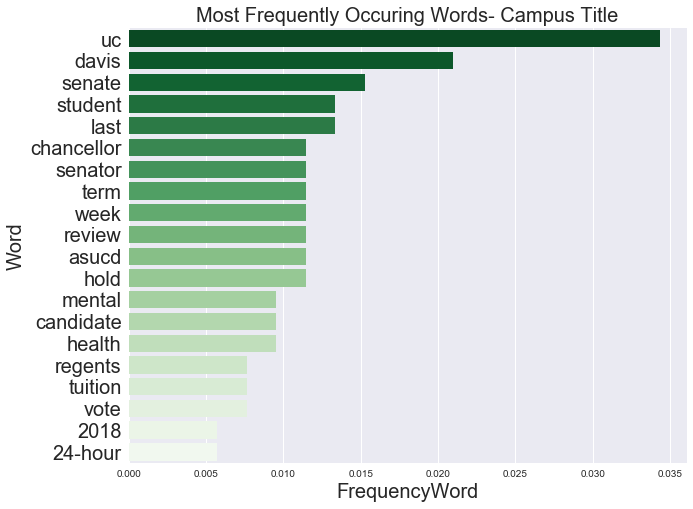

In [955]:
# Camp Title
df=Camp_title_count[0:20]
sns.barplot( x='Freq' , y='word', data = df, palette= "Greens_r")

sns.set(rc={'figure.figsize':(10,8)})
plt.title('Most Frequently Occuring Words- Campus Title',fontsize=20 )
plt.xlabel("FrequencyWord", fontsize=20)
plt.ylabel("Word", fontsize=20)
plt.yticks(fontsize=20)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

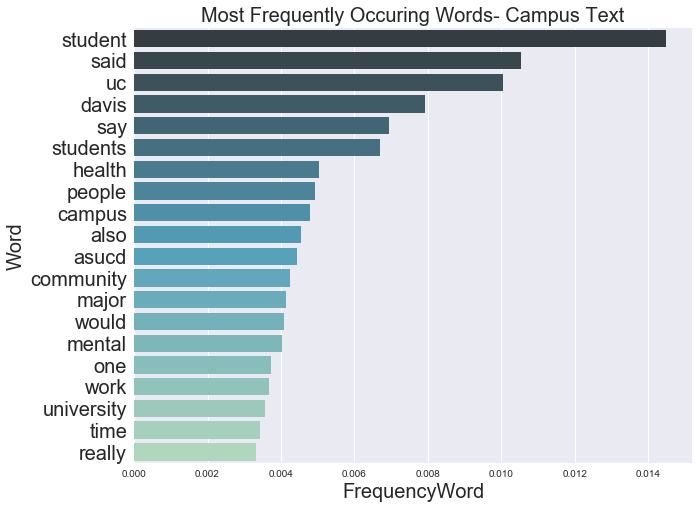

In [956]:
# Camp Title
df=Camp_text_count[0:20]
sns.barplot( x='Freq' , y='word', data = df, palette= "GnBu_d")

sns.set(rc={'figure.figsize':(10,8)})
plt.title('Most Frequently Occuring Words- Campus Text',fontsize=20 )
plt.xlabel("FrequencyWord", fontsize=20)
plt.ylabel("Word", fontsize=20)
plt.yticks(fontsize=20)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

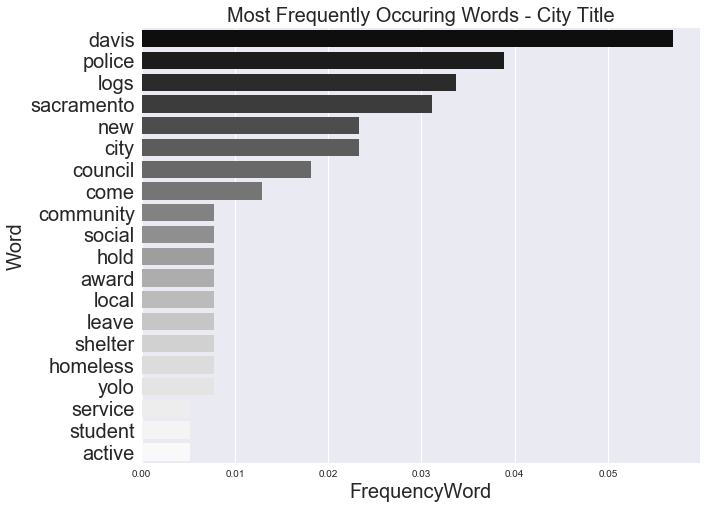

In [957]:
# City Title
df=City_title_count[0:20]
sns.barplot( x='Freq' , y='word', data = df, palette= "Greys_r")

sns.set(rc={'figure.figsize':(10,8)})
plt.title('Most Frequently Occuring Words - City Title',fontsize=20 )
plt.xlabel("FrequencyWord", fontsize=20)
plt.ylabel("Word", fontsize=20)
plt.yticks(fontsize=20)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text yticklabel objects>)

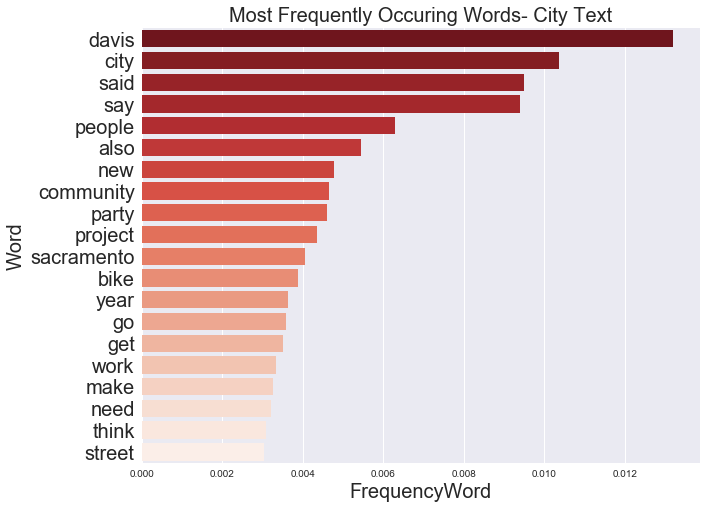

In [958]:
# City Text
df=City_text_count[0:20]
sns.barplot( x='Freq' , y='word', data = df, palette= "Reds_r")

sns.set(rc={'figure.figsize':(10,8)})
plt.title('Most Frequently Occuring Words- City Text',fontsize=20 )
plt.xlabel("FrequencyWord", fontsize=20)
plt.ylabel("Word", fontsize=20)
plt.yticks(fontsize=20)

## ANS to 1.4.1 
### What topics does the Aggie cover the most? 
Based on the word count of News Title for campus news, the most common words are uc davis, senate, student, chancellor, term, mental, tuition. Based on the word count in Article Text for campus news, the most common words are student, said, uc davis, health, asucd, community, and major. Thus, topics that campus news cover the most are like administration, school police, mental-related topics, and tuition.

Together, topics that campus news covers the most are like administration, school police, mental-related topics, student life, and tuition.

### Do city articles typically cover different topics than campus articles?
First, let's see the word count for article title and text in the City News. Common words in article title of City are davis, police, logs, sacramento, council, community, local, shelter, homeless and so forth. Common words in article text of city are davis, city, said, people, new, community, party, project, bike, need, street and so forth. These term in City news gave me a sense that city news focus more on city's administration, local community, police-related information, and the care of homeless people.

Thus, I would say city articles typically cover different topics than campus articles.

### 1.4.2 What are the titles of the top 3 pairs of most similar articles? Examine each pair of articles. What words do they have in common?

In [803]:
Big_DF.head()

,category,author,text,title,url
0,campus,George Liao,Funding for Student Advocates for Mental Healt...,Last week in Senate,https://theaggie.org/2018/03/13/last-week-in-s...
1,campus,Hannah Holzer,Proposed $978 tuition hikeAt the upcoming UC R...,UC Regents will vote on nonresident tuition hi...,https://theaggie.org/2018/03/12/uc-regents-wil...
2,campus,Sabrina Habchi,Controversy over academic honesty suspicions i...,Cheating allegations in SOC 46A,https://theaggie.org/2018/03/12/cheating-alleg...
3,campus,Jacqueline Moore,Task forces to review affordable housing food ...,Chancellor creates three task forces to improv...,https://theaggie.org/2018/03/12/chancellor-cre...
4,campus,Jacqueline Moore,Guy-Uriel Charles speaks at King HallDuke Univ...,Duke law professor presents lecture on voting ...,https://theaggie.org/2018/03/06/duke-law-profe...


In [844]:
# Find multiple maximum values in a 2d array fast
# https://stackoverflow.com/questions/20825990/find-multiple-maximum-values-in-a-2d-array-fast

def nlargest_indices(array, k):
    """nlargest_indices finds the n largest values in arr and then returns the x and y indices 
        Arg: arr is the array, n is the threshold
        Return: it returns the x and y indices
        Author: Warren Weckesser
    """
    uniques = np.unique(array)
    threshold = uniques[-k]
    return np.where(array >= threshold)

In [1029]:
# clean the text before calculating the similarity. The purpose is to remove stopwords
DOC = []

for text in Big_DF['text']:
    blob1 = TextBlob(text)
    
    #Removing Noise
    from nltk.corpus import stopwords  # I need to keep this line in this code chuck to prevent error
    stopwords = stopwords.words("english")
    new_text = " ".join(w for w in blob1.words if w.lower() not in stopwords and len(w) > 1)  #len(w)>1 remove any single symbol
    blob2 = TextBlob(new_text)
    
    # lemmatize 
    tags = [wordnet_pos(x[1]) for x in blob2.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob2.words, tags))
    blob3 = [str(TextBlob(new_text)) ]
    
    DOC = DOC+blob3
    
#DOC

In [1030]:
len(DOC)

150

In [989]:
DOC_rm = []

for text in DOC:
    blob1 = TextBlob(text)
    
    #Removing Noise
    from nltk.corpus import stopwords  # I need to keep this line in this code chuck to prevent error
    stopwords = stopwords.words("english")
    new_text = " ".join(w for w in blob1.words if w.lower() not in stopwords and len(w) > 1)  #len(w)>1 remove any single symbol
    blob2 = TextBlob(new_text)
    
    # lemmatize 
    tags = [wordnet_pos(x[1]) for x in blob2.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob2.words, tags))
    blob3 = [str(TextBlob(new_text)) ]
    
    DOC_rm = DOC_rm+blob3

In [1014]:
# Term frequency-inverse document frequency

# data inout
tf_idf = TfidfVectorizer().fit_transform(DOC_rm)

# Use .A to display a sparse matrix.
Similarity_Mat = (tf_idf * tf_idf.T).A

# Make the diagonal as 0
np.fill_diagonal(Similarity_Mat, 0)

# Make the upper tri as 0
Similarity_Mat *= np.tri(*Similarity_Mat.shape)

# find the indicies
x, y = nlargest_indices(Similarity_Mat, 4)
print(x)
print(y)

[20 25 63 74]
[ 8 19 53 44]


In [1028]:
# check the pairs of articule with higest similarity
print(Similarity_Mat[63,53])
print(Big_DF.title[63])
print(Big_DF.title[53])
print( Big_DF.url[63])
print(Big_DF.url[53])

print(Similarity_Mat[74,44])
print(Big_DF.title[74])
print(Big_DF.title[44])

print(Similarity_Mat[20,8])
print(Big_DF.title[20])
print(Big_DF.title[8])

print(Similarity_Mat[25,19])
print(Big_DF.title[25])
print(Big_DF.title[19])

0.9996973964438675
700 students to attend 24-hour HackDavis hackathon on Jan. 20
700 students to attend 24-hour HackDavis hackathon on Jan. 20
https://theaggie.org/2018/01/19/700-students-attend-24-hour-hackdavis-hackathon-jan-20-2/
https://theaggie.org/2018/01/25/700-students-attend-24-hour-hackdavis-hackathon-jan-20/
0.7184949376218452
Second student-run Mental Health Conference will offer accessible mental health information, resources
Sold-out Mental Health Conference featured keynotes from Sacramento mayor, UCSB shooting survivor
0.5645133622227345
Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop
Executive ticket candidates claim biases against non-ASUCD affiliated individuals
0.5241002609459692
2018 ASUCD Winter Elections — meet the candidates
ASUCD Senate candidates debate to largely inattentive crowd


In [1017]:
# select the pair of articles 
D20 = DOC[20]
D8 = DOC[8]
D63 = DOC[63]
D53 = DOC[53]
D74 = DOC[74]
D44 = DOC[44]
D25 = DOC[25]
D19 = DOC[19]

In [1018]:
# Get the word count for each article text
D20_count= word_count(D20)
D8_count= word_count(D8)
D63_count= word_count(D63)
D53_count= word_count(D53)
D74_count= word_count(D74)
D44_count= word_count(D44)
D25_count= word_count(D25)
D19_count= word_count(D19)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


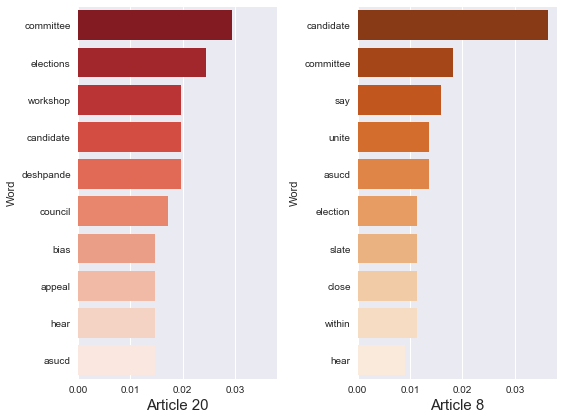

In [1031]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True)

df=D20_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="Reds_r", ax=ax1)
ax1.set_ylabel("Word")
ax1.set_xlabel("Article 20", fontsize=15)

df=D8_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="Oranges_r", ax=ax2)
ax2.set_ylabel("Word")
ax2.set_xlabel("Article 8",fontsize=15)

# Finalize the plot
plt.tight_layout(h_pad=3)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


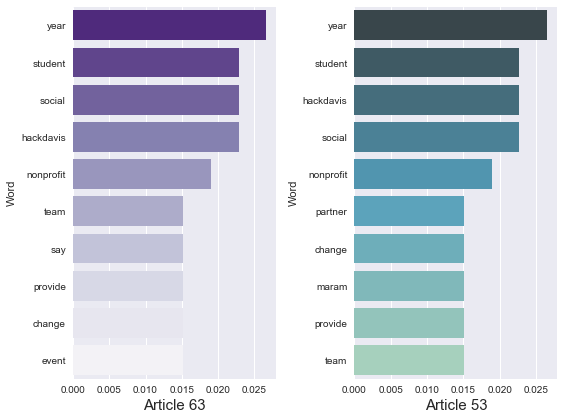

In [1032]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True)

df=D63_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="Purples_r", ax=ax1)
ax1.set_ylabel("Word")
ax1.set_xlabel("Article 63", fontsize=15)

df=D53_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="GnBu_d", ax=ax2)
ax2.set_ylabel("Word")
ax2.set_xlabel("Article 53",fontsize=15)


# Finalize the plot
plt.tight_layout(h_pad=3)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


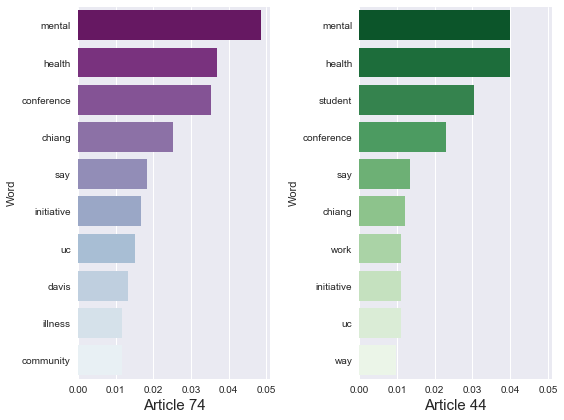

In [1033]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True)

df=D74_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="BuPu_r", ax=ax1)
ax1.set_ylabel("Word")
ax1.set_xlabel("Article 74", fontsize=15)

df=D44_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="Greens_r", ax=ax2)
ax2.set_ylabel("Word")
ax2.set_xlabel("Article 44",fontsize=15)


# Finalize the plot

plt.tight_layout(h_pad=3)

C:\Users\WeiKuang\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


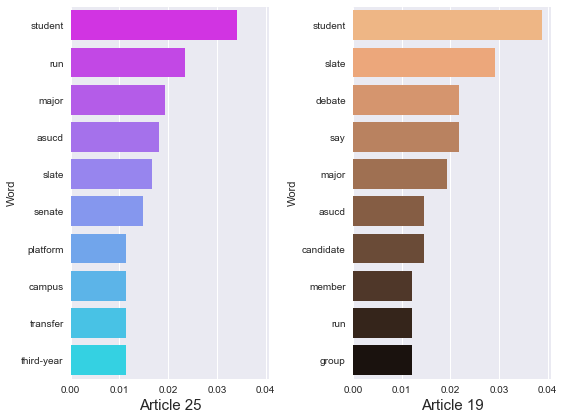

In [1034]:
# Set up the matplotlib figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True)

df=D25_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="cool_r", ax=ax1)
ax1.set_ylabel("Word")
ax1.set_xlabel("Article 25", fontsize=15)

df=D19_count[0:10]
sns.barplot( x='Freq' , y='word', data = df, palette="copper_r", ax=ax2)
ax2.set_ylabel("Word")
ax2.set_xlabel("Article 19",fontsize=15)

# Finalize the plot
plt.tight_layout(h_pad=3)

In [1003]:
#pd.DataFrame(Similarity_Mat)

### ANS to 1.4.2 
### What are the titles of the top 3 pairs of most similar articles? 
First, my top pair of articles are accidentally the same article with the title "700 students to attend 24-hour HackDavis hackathon on Jan. 20". This article might appear in the news webpage twice in the different page, so I get them when doing web scrapping. Thus, after removing this false pairs, my top 3 pairs of most similar articles with the similarity (Term frequency-inverse document frequency) are:
* (1) articles(74,44) - similarity = 0.7184949376218452
* (2) articles(20,8) - similarity = 0.5645133622227345 
* (3) articles(25,19) - similarity = 0.5241002609459692  

These titles are: 
* Pair1: article74: Second student-run Mental Health Conference will offer accessible mental health information, resources
* Pair1: article44: Sold-out Mental Health Conference featured keynotes from Sacramento mayor, UCSB shooting survivor


* Pair2: article20: Adam Hatefi and Shreya Deshpande disqualified after missing mandatory Candidate Workshop
* Pair2: article8: Executive ticket candidates claim biases against non-ASUCD affiliated individuals


* Pair3: article25: 2018 ASUCD Winter Elections — meet the candidates
* Pair3: article19: ASUCD Senate candidates debate to largely inattentive crowd

### Examine each pair of articles. What words do they have in common?
By viewing the barplot of word count for each pair. The top common words are:
* Pair1: mental, health, conference, say, initiative, uc
* Pair2: committee, elections, asucd
* Pair3: student, asucd


### ANS to 1.4.3 Do you think this corpus is representative of the Aggie? Why or why not? What kinds of inference can this corpus support? Explain your reasoning.
Ideally, if time allows, I would do web scraping in different categories, and then evaluate the similarity between news(campus and city) and other categories. The similarity matrix will reveal whether this corpus(news - campus and city) is representative of the Aggie.

Without this information, I would guess that this corpus might be representative of the Aggie. Because our corpus is from news category, it this section is expected to cover most of the events in other category. For example, an art festival event might be on art category but also on the news. Similarly, if UC Davis wins any sport game, the news and sports categories should both report similar topics on this event.

However, my guess can be wrong. By the current corpus I have, the inference I could make is that the news category covers the topics related to mental-related topics, student life, and tuition, according to the 1.4.1 information.